<a href="https://colab.research.google.com/github/MLJCUnito/ProjectX2020/blob/master/HowToTackleAMLCompetition/Lecture7%7CAdvancedFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
!pip install scikit-bio geopandas libpysal splot pygeos

     |████████████████████████████████| 1.6MB 2.7MB/s 


http://readiab.org/ Applied Bioinformatics in Python

# K-Nearest-Neighbors (KNN)

Intro with sklearn and a quick example

### A Use Case (KNN and Geo-Data)

In [2]:
!wget https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson

--2020-08-27 13:03:06--  https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37928373 (36M) [text/plain]
Saving to: ‘limits_IT_municipalities.geojson’

limits_IT_municipal 100%[===================>]  36.17M  53.0MB/s    in 0.7s    

2020-08-27 13:03:10 (53.0 MB/s) - ‘limits_IT_municipalities.geojson’ saved [37928373/37928373]



In [38]:
import geopandas as gpd 
import matplotlib.pyplot as plt 
import libpysal.weights as lp 
from splot.libpysal import plot_spatial_weights

In [4]:
municip = gpd.read_file("limits_IT_municipalities.geojson")
piemonte_municip = municip[municip.reg_name == "Piemonte"]
torino_prov = piemonte_municip[piemonte_municip.prov_name == "Torino"]
torino_prov.head()

,name,op_id,minint_elettorale,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,name_it,name_de,name_sl,geometry
0,Agliè,130,1010810010,Torino,001,1,TO,Piemonte,01,1,1,A074,001001,1001,None,None,None,"MULTIPOLYGON (((7.78266 45.38717, 7.79106 45.3..."
1,Airasca,131,1010810020,Torino,001,1,TO,Piemonte,01,1,2,A109,001002,1002,None,None,None,"MULTIPOLYGON (((7.48795 44.93917, 7.49307 44.9..."
2,Ala di Stura,132,1010810030,Torino,001,1,TO,Piemonte,01,1,3,A117,001003,1003,None,None,None,"MULTIPOLYGON (((7.27324 45.33927, 7.27360 45.3..."
3,Albiano d'Ivrea,133,1010810040,Torino,001,1,TO,Piemonte,01,1,4,A157,001004,1004,None,None,None,"MULTIPOLYGON (((7.92507 45.44821, 7.92682 45.4..."
4,Almese,135,1010810060,Torino,001,1,TO,Piemonte,01,1,6,A218,001006,1006,None,None,None,"MULTIPOLYGON (((7.43490 45.13442, 7.43524 45.1..."


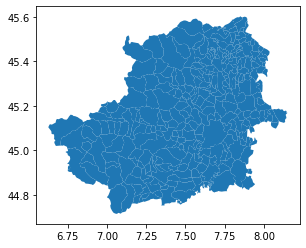

In [5]:
torino_prov.plot()

In [6]:
torino_prov.shape

(312, 18)

In [11]:
import libpysal
libpysal.__version__

'4.3.0'

In [14]:
w_queen = lp.Queen.from_dataframe(torino_prov, geom_col= "geometry")

In [16]:
w_queen.neighbors[4]

[224, 278, 296, 11, 60]

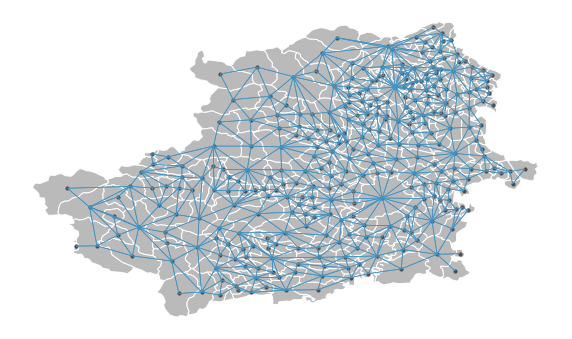

In [39]:
plot_spatial_weights(w_queen, torino_prov)
plt.show()

In [25]:
w_knn5 = lp.KNN.from_dataframe(torino_prov, k = 5)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff021214208>)

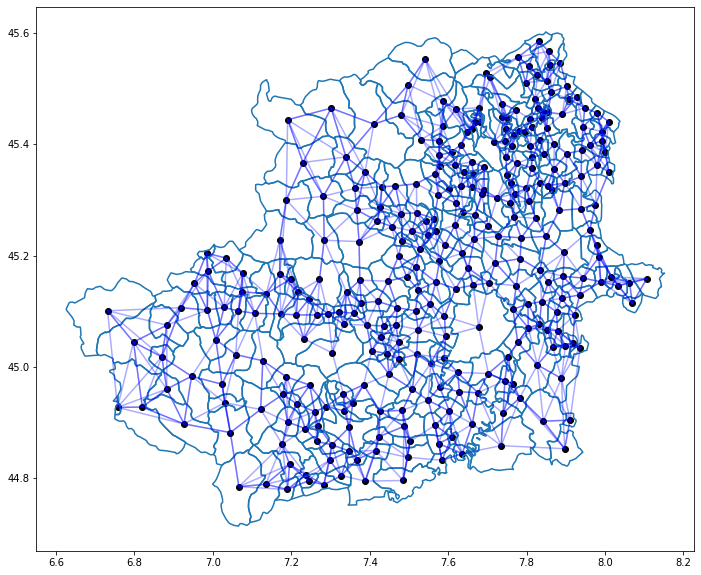

In [59]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
torino_prov.boundary.plot(ax = axis)
w_knn5.plot(torino_prov, edge_kws= dict(color = "blue", alpha = .33), ax = axis)

In [27]:
len(w_knn5.asymmetries)

652

In [28]:
w_knn5.nonzero

1560

In [56]:
w_knn3 = lp.KNN.from_dataframe(torino_prov, k = 3)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff023c258d0>)

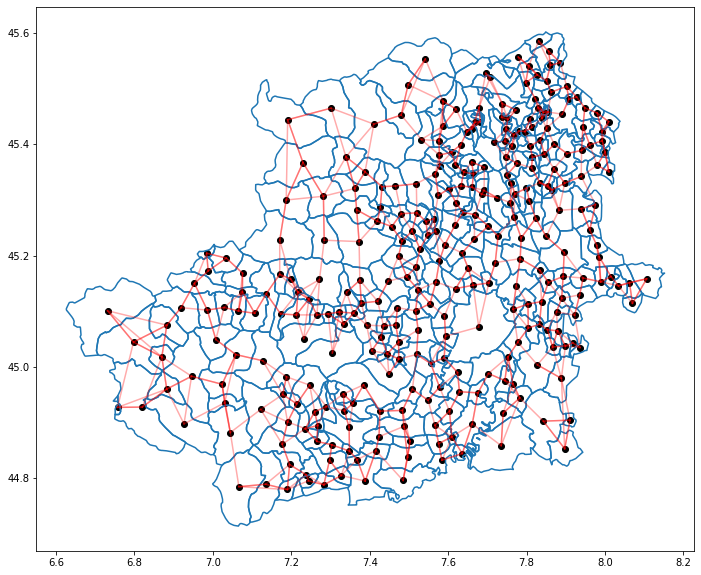

In [58]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
torino_prov.boundary.plot(ax = axis)
w_knn3.plot(torino_prov, edge_kws= dict(color = "red", alpha = .33), ax = axis)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff01dc4d320>)

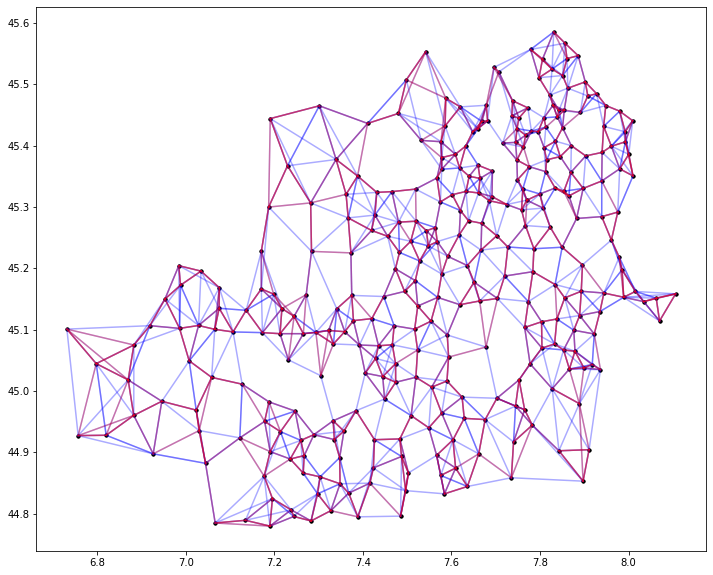

In [61]:
figure, axis = plt.subplots(1,1, figsize = (12, 10))
#torino_prov.boundary.plot(ax = axis)
w_knn5.plot(torino_prov, edge_kws= dict(color = "blue", alpha = .33),
            node_kws = dict(marker = "."), ax = axis)
w_knn3.plot(torino_prov, edge_kws=dict(color = "red", alpha = .33 ), 
            node_kws = dict(marker ="."), ax =axis)

Note that every link in the KNN-3 is also contained in the KNN-5. This is because every observation that is one of the top two closest observations to another observation will always be in the closest five as well.

(array([ 14.,  74., 143.,  51.,  19.,   8.,   1.,   1.,   0.,   1.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <a list of 10 Patch objects>)

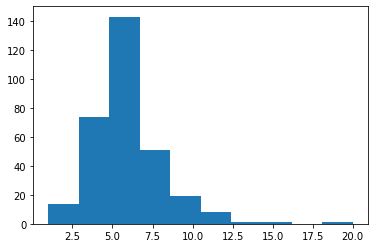

In [62]:
plt.hist(w_queen.sparse.sum(axis = 1))

(array([  0.,   0.,   0.,   0.,   0., 312.,   0.,   0.,   0.,   0.]),
 array([4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5]),
 <a list of 10 Patch objects>)

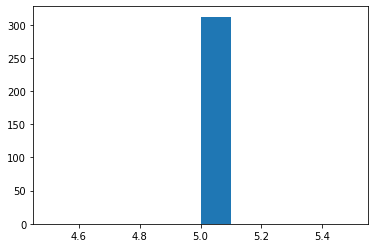

In [35]:
plt.hist(w_knn5.sparse.sum(axis = 1))

In [63]:
w_knn5_symmetric = w_knn5.symmetrize()

In [65]:
w_knn5_symmetric.asymmetries

[]

(array([107.,   0., 109.,   0.,   0.,  75.,   0.,  17.,   0.,   4.]),
 array([5. , 5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <a list of 10 Patch objects>)

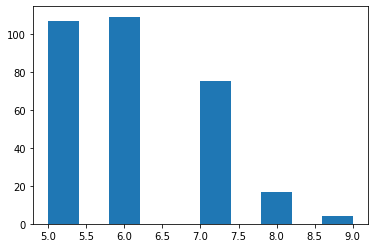

In [66]:
plt.hist(w_knn5_symmetric.sparse.sum(axis = 1))

### Kernel Weights (Bonus)

### A Non-Euclidean Distance: Bray-Curtis

Definition, a few lines on non-euclidean distances

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

sample_ids = ['A', 'B', 'C']
feature_ids = ['OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5']
data = np.array([[1, 0, 0],
                 [3, 2, 0],
                 [0, 0, 6],
                 [1, 4, 2],
                 [0, 4, 1]])

table1 = pd.DataFrame(data, index=feature_ids, columns=sample_ids)
table1

In [ ]:
#from scipy.spatial.distance import braycurtis
from skbio.stats.distance import DistanceMatrix

In [ ]:
def bray_curtis_distance(table, sample1_id, sample2_id):
    numerator = 0
    denominator = 0
    sample1_counts = table[sample1_id]
    sample2_counts = table[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += sample1_count + sample2_count
    return numerator / denominator

In [ ]:
def df_to_distances(table, pairwise_distance_fn):
    sample_ids = table.columns
    num_samples = len(sample_ids)
    data = np.zeros((num_samples, num_samples))
    for i, sample1_id in enumerate(sample_ids):
        for j, sample2_id in enumerate(sample_ids[:i]):
            data[i,j] = data[j,i] = pairwise_distance_fn(table, sample1_id, sample2_id)
    return DistanceMatrix(data, sample_ids)

In [ ]:
df_to_distances(table1, bray_curtis_distance)

## Matrix Factorization Methods: NMF, SVD, PCA

## Feature Interactions

## Manifold Learning Methods: t-SNE, UMAP